This notebook is intended to explore whether it is feasible to randomly sample data for each 5-second window, sample multiple 2-second audios, and view the frequency domain image.

The purpose of this is to make multi-channel audio input.

In [63]:
import pandas as pd
import numpy as np
import librosa
from pydub import AudioSegment
import matplotlib.pyplot as plt
import random

In [64]:
path='../../data/train/asbfly/XC134896.ogg'

In [65]:
audio = AudioSegment.from_ogg(path)

print(audio)
print(type(audio))

# audio duration
duration_seconds=len(audio)/1000.0

print(duration_seconds)
# print(duration_seconds/60) # minutes

# sampling rate
sr=audio.frame_rate

print(sr)

# the num of channels
print(audio.channels)

# bit depth
bit_depth=audio.sample_width * 8

print(bit_depth)

<class 'pydub.audio_segment.AudioSegment'>
27.35
32000
1
32


Extract a 5-second segment from the original audio.
Randomly extract a number of discontinuous segments from this 5-second segment, and the total length of each segment is 2 seconds.

In [49]:

# load audio file
audio = AudioSegment.from_file(path, format="ogg")

# Capture 5 seconds of audio
five_seconds_audio = audio[:5000]  # Capture the first 5000ms

# random extract a total of 2 seconds of audio
total_duration_ms = 2000

# Store the extracted fragments
extracted_segments = AudioSegment.silent(duration=0)  # Create a silent clip for subsequent splicing

# Continue looping when the total length of the extracted segments is less than 2 seconds
while extracted_segments.duration_seconds < 2:
    # random choose a starting point
    start_ms = random.randint(0, len(five_seconds_audio) - 1)
    # Calculate the maximum duration that can be extracted
    max_extract_ms = total_duration_ms - int(extracted_segments.duration_seconds * 1000)
    # random determine the duration of this draw
    extract_duration_ms = random.randint(1, max_extract_ms)
    # random extracted clip
    extract = five_seconds_audio[start_ms:start_ms+extract_duration_ms]
    # concat clips
    extracted_segments += extract

# The final discontinuous random 2 seconds of audio data
random_two_seconds = extracted_segments

# If you want to play this audio
# play(random_two_seconds)

# save the audio
# random_two_seconds.export("random_two_seconds.ogg", format="ogg")

In [50]:
random_two_seconds

In [51]:
# convert audio to numpy array
samples = np.array(random_two_seconds.get_array_of_samples())

In [52]:
samples

array([ -1772237,  -2345580,  -4400057, ...,   4916969, -23515814,
       -23645444], dtype=int32)

In [53]:
# normalization

slice_0_2sec_arr=samples / float(2**(bit_depth-1))

In [54]:
slice_0_2sec_arr

print(len(slice_0_2sec_arr))

64000


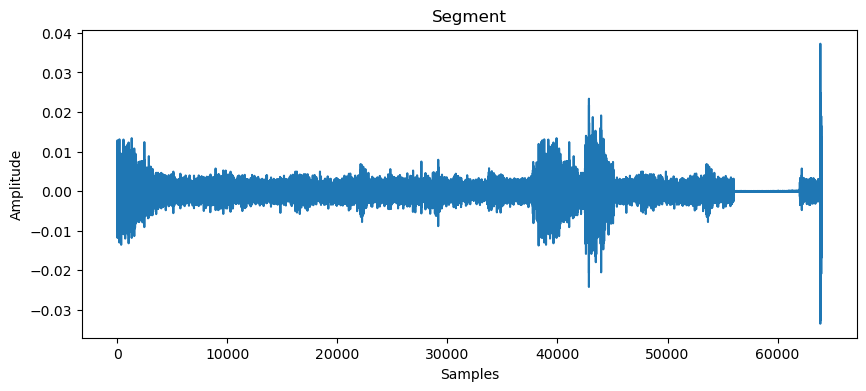

In [55]:
plt.figure(figsize=(10, 4))  
plt.plot(slice_0_2sec_arr)
plt.title(f'Segment')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

Text(0, 0.5, 'Magnitude')

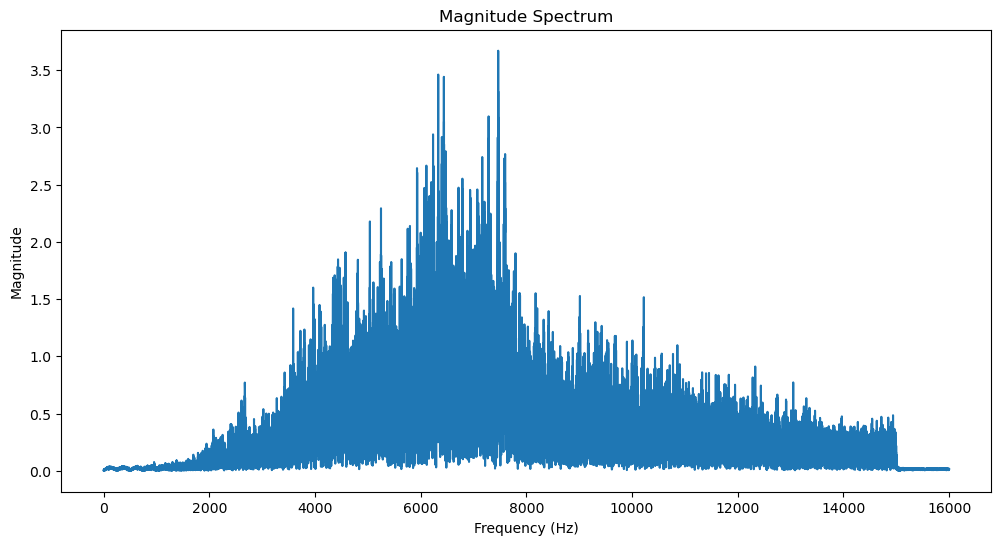

In [56]:
fft = np.fft.fft(slice_0_2sec_arr)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))


half_len = len(magnitude) // 2  
plt.figure(figsize=(12, 6))
plt.plot(frequency[:half_len], magnitude[:half_len])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

In [57]:
# Capture 5 seconds of audio
five_seconds_audio = audio[:5000]  # Capture the first 5000ms

# random extract a total of 2 seconds of audio
total_duration_ms = 2000

# Store the extracted fragments
extracted_segments = AudioSegment.silent(duration=0)  # Create a silent clip for subsequent splicing


# Continue looping when the total length of the extracted segments is less than 2 seconds
while extracted_segments.duration_seconds < 2:
    # random select a start point
    start_ms = random.randint(0, len(five_seconds_audio) - 1)
    # Calculate the maximum duration that can be extracted
    max_extract_ms = total_duration_ms - int(extracted_segments.duration_seconds * 1000)
    # random determine the duration of this draw
    extract_duration_ms = random.randint(1, max_extract_ms)
    # random extracted clip
    extract = five_seconds_audio[start_ms:start_ms+extract_duration_ms]
    # concat clips
    extracted_segments += extract

# The final discontinuous random 2 seconds of audio data
random_two_seconds = extracted_segments

# play(random_two_seconds)

# random_two_seconds.export("random_two_seconds.ogg", format="ogg")

In [58]:
random_two_seconds

In [59]:
# convert audio to numpy array
samples = np.array(random_two_seconds.get_array_of_samples())

In [60]:
# normalization

slice_0_2sec_arr=samples / float(2**(bit_depth-1))

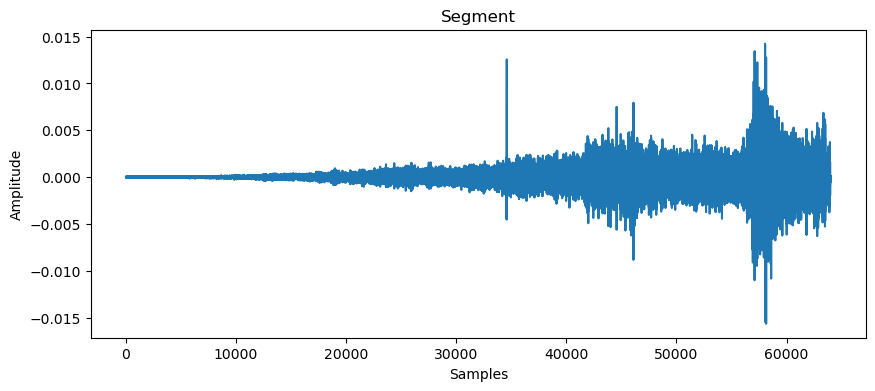

In [61]:
plt.figure(figsize=(10, 4)) 
plt.plot(slice_0_2sec_arr)
plt.title(f'Segment')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

Text(0, 0.5, 'Magnitude')

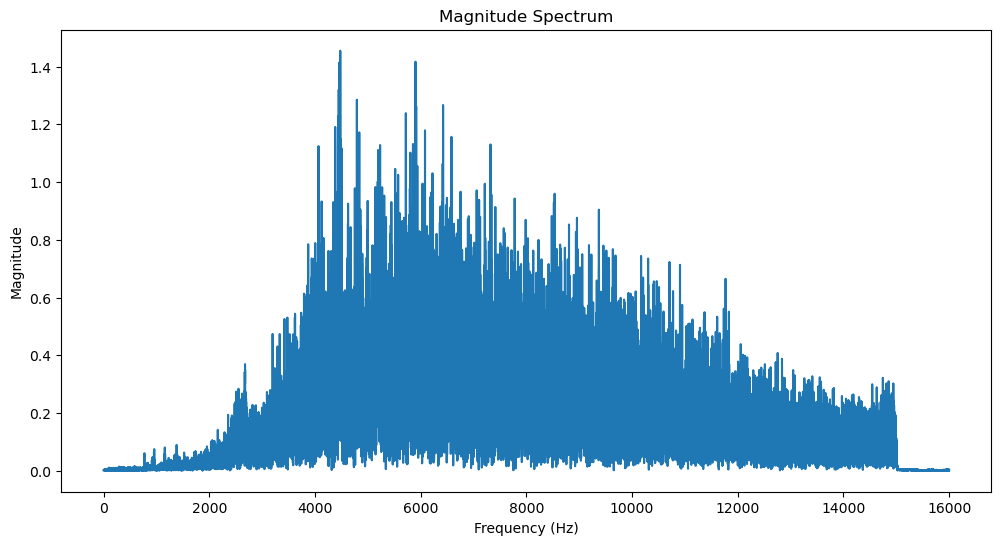

In [62]:
fft = np.fft.fft(slice_0_2sec_arr)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))


half_len = len(magnitude) // 2 
plt.figure(figsize=(12, 6))
plt.plot(frequency[:half_len], magnitude[:half_len])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')